In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as  plt

In [4]:
df = pd.read_csv('List of Countries by Sugarcane Production.csv')

In [5]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [6]:
df.shape

(103, 7)

# Data Cleaning

In [14]:
df['Production (Tons)'] = df['Production (Tons)'].str.replace('.','')
df['Production per Person (Kg)'] = df['Production per Person (Kg)'].str.replace('.','').str.replace(',','.')
df['Acreage (Hectare)'] = df['Acreage (Hectare)'].str.replace('.','')
df['Yield (Kg / Hectare)'] = df['Yield (Kg / Hectare)'].str.replace('.','').str.replace(',','.')

In [15]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668531,10226205,751675
1,1,India,Asia,348448000,260721,4950000,703935
2,2,China,Asia,123059739,88287,1675215,734591
3,3,Thailand,Asia,87468496,1264303,1336575,654422
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [17]:
df.rename(columns = {'Production (Tons)':'Production(Tons)'}, inplace=True)
df.rename(columns = {'Production per Person (Kg)':'Production_per_Person(Kg)'}, inplace=True)
df.rename(columns = {'Acreage (Hectare)':'Acreage(Hectare)'}, inplace=True)
df.rename(columns = {'Yield (Kg / Hectare)':'Yield(Kg/Hectare)'}, inplace=True)

In [18]:
df.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668531,10226205,751675
1,1,India,Asia,348448000,260721,4950000,703935
2,2,China,Asia,123059739,88287,1675215,734591
3,3,Thailand,Asia,87468496,1264303,1336575,654422
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [20]:
df.isna().sum()

Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [21]:
df[df['Acreage(Hectare)'].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [22]:
df = df.dropna().reset_index()

In [23]:
df.head()

,index,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,0,Brazil,South America,768678382,3668531,10226205,751675
1,1,1,India,Asia,348448000,260721,4950000,703935
2,2,2,China,Asia,123059739,88287,1675215,734591
3,3,3,Thailand,Asia,87468496,1264303,1336575,654422
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [25]:
df.drop(['index','Unnamed: 0'],axis=1,inplace=True)

In [26]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668531,10226205,751675
1,India,Asia,348448000,260721,4950000,703935
2,China,Asia,123059739,88287,1675215,734591
3,Thailand,Asia,87468496,1264303,1336575,654422
4,Pakistan,Asia,65450704,324219,1130820,57879


In [27]:
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_Person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

In [28]:
df['Production(Tons)'] = df['Production(Tons)'].astype(float)
df['Production_per_Person(Kg)'] = df['Production_per_Person(Kg)'].astype(float)
df['Acreage(Hectare)'] = df['Acreage(Hectare)'].astype(float)
df['Yield(Kg/Hectare)'] = df['Yield(Kg/Hectare)'].astype(float)

In [29]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_Person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

In [31]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_Person(Kg)    101
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

# Univariate Analysis

In [32]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0


## How many countries produce surgarcane from each continent?

In [33]:
df['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

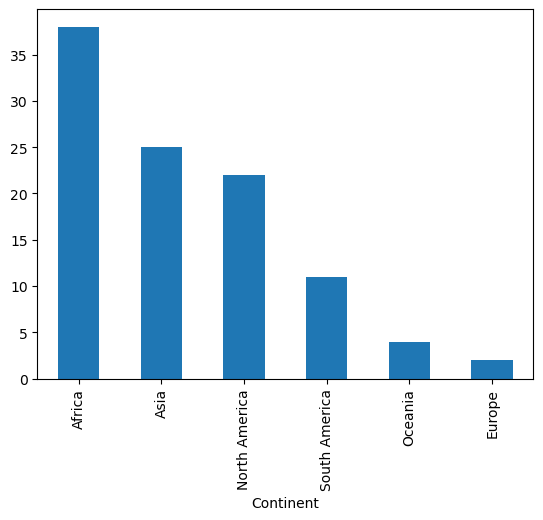

In [37]:
df['Continent'].value_counts().plot(kind = 'bar')

# distribution of columns

C:\Users\allav\AppData\Local\Temp\ipykernel_15460\2467860319.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production(Tons)'])
C:\Users\allav\AppData\Local\Temp\ipykernel_15460\2467860319.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production_per_Person(Kg)'])
C:\Users\alla

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Density'>

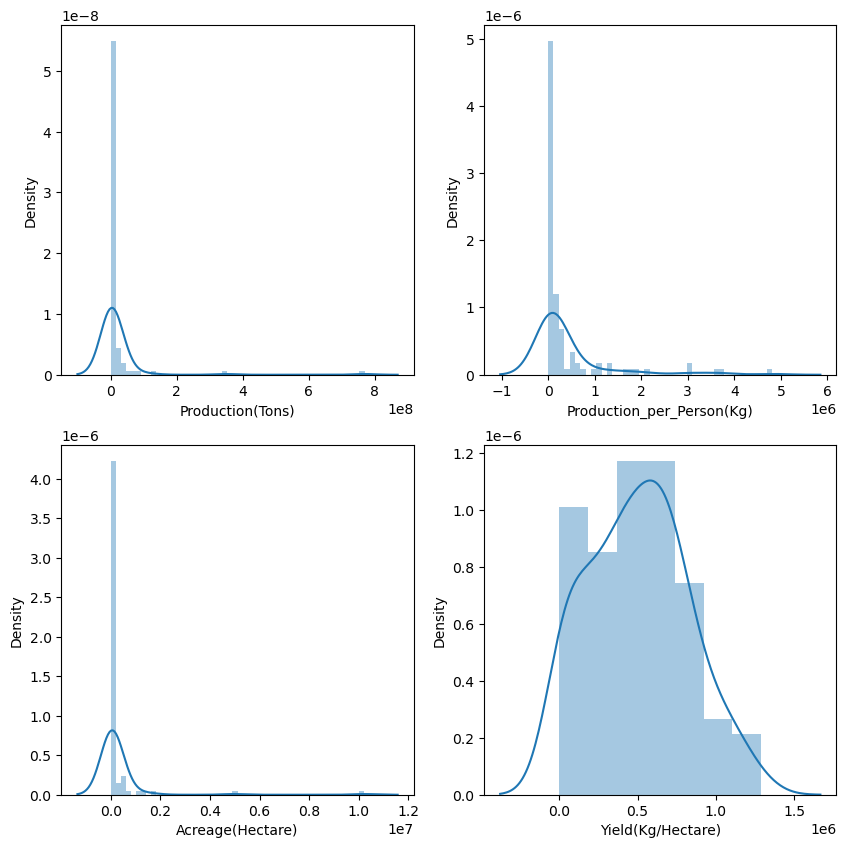

In [39]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df['Production(Tons)'])
plt.subplot(2,2,2)
sns.distplot(df['Production_per_Person(Kg)'])
plt.subplot(2,2,3)
sns.distplot(df['Acreage(Hectare)'])
plt.subplot(2,2,4)
sns.distplot(df['Yield(Kg/Hectare)'])

# checking outliers

<Axes: ylabel='Yield(Kg/Hectare)'>

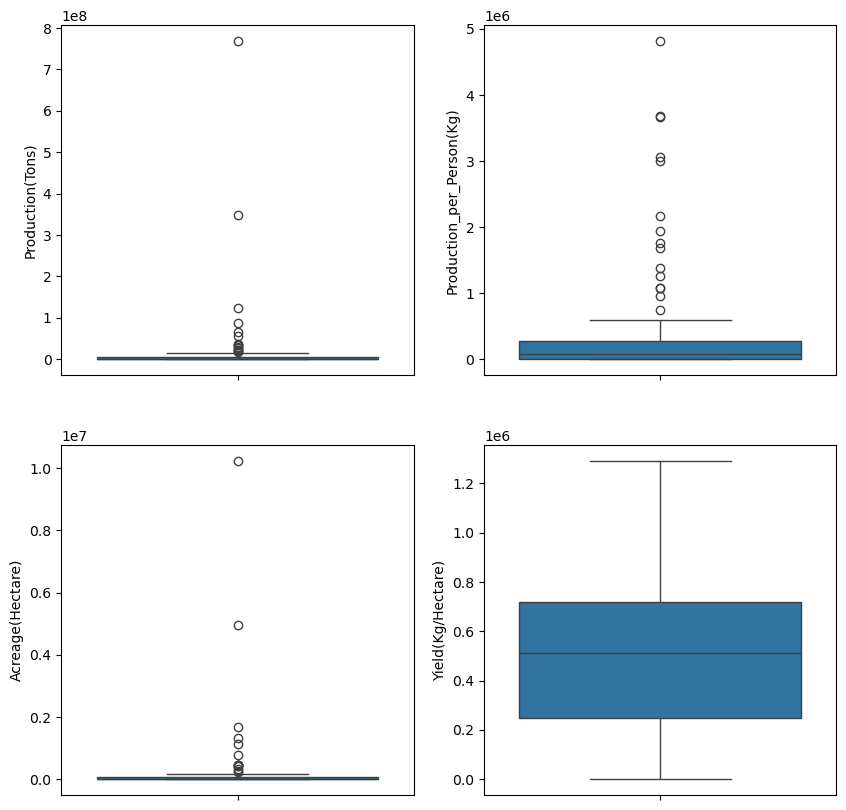

In [40]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df['Production(Tons)'])
plt.subplot(2,2,2)
sns.boxplot(df['Production_per_Person(Kg)'])
plt.subplot(2,2,3)
sns.boxplot(df['Acreage(Hectare)'])
plt.subplot(2,2,4)
sns.boxplot(df['Yield(Kg/Hectare)'])

In [41]:
df.describe()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02
mean,1.850372e+07,4.124805e+05,2.498981e+05,5.018502e+05
std,8.419149e+07,8.669140e+05,1.137003e+06,3.169530e+05
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01
25%,6.251875e+04,1.075225e+04,1.104000e+03,2.487505e+05
50%,1.440044e+06,8.135850e+04,1.655800e+04,5.102500e+05
75%,6.426824e+06,2.828128e+05,8.047400e+04,7.198920e+05
max,7.686784e+08,4.816299e+06,1.022620e+07,1.290493e+06


# Bivariate Analysis

In [42]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0


## Which country produces maximum sugarcane?

In [43]:
df_new = df[['Country','Production(Tons)']].set_index('Country')

In [44]:
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [45]:
df_new['Production(Tons)_percentage'] = df_new['Production(Tons)']*100/df_new['Production(Tons)'].sum()

In [46]:
df_new

,Production(Tons),Production(Tons)_percentage
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)_percentage'>

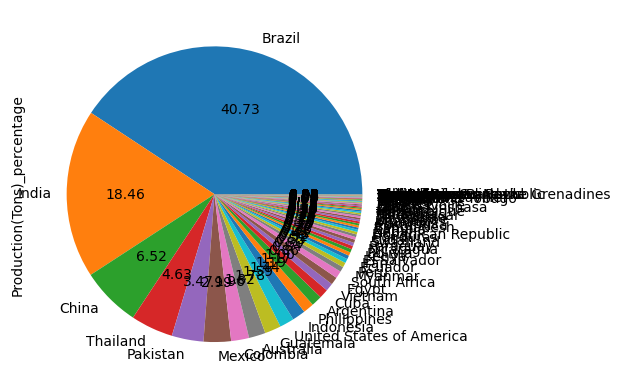

In [54]:
df_new['Production(Tons)_percentage'].plot(kind = 'pie',autopct='%.2f')

<Axes: xlabel='Country'>

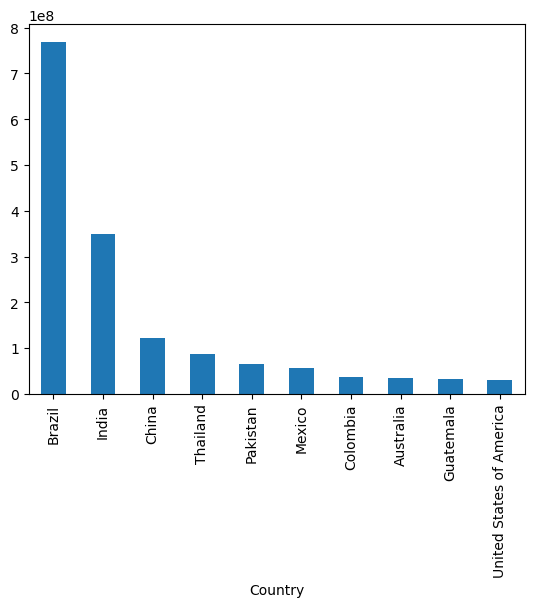

In [56]:
df_new['Production(Tons)'].head(10).plot(kind = 'bar')

## Which country produces more sugarcane?

C:\Users\allav\AppData\Local\Temp\ipykernel_15460\3769643441.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


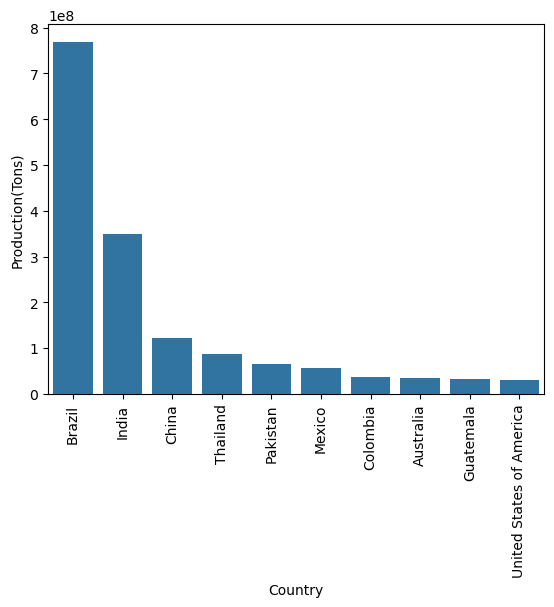

In [61]:
df_prdns = df.sort_values('Production(Tons)', ascending=False)
ax = sns.barplot(data = df.head(10),x='Country',y='Production(Tons)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

## Which country has maximum land?

C:\Users\allav\AppData\Local\Temp\ipykernel_15460\811241591.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


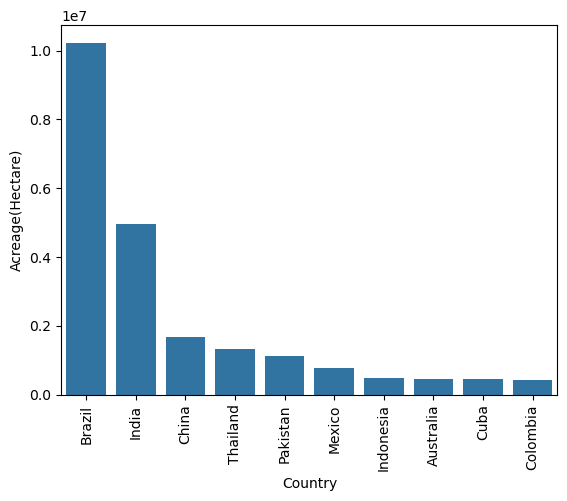

In [60]:
df_acr = df.sort_values('Acreage(Hectare)',ascending=False)
ax = sns.barplot(data = df_acr.head(10),x='Country',y='Acreage(Hectare)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

## Which country has highest yield per hectare?

C:\Users\allav\AppData\Local\Temp\ipykernel_15460\1540318642.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


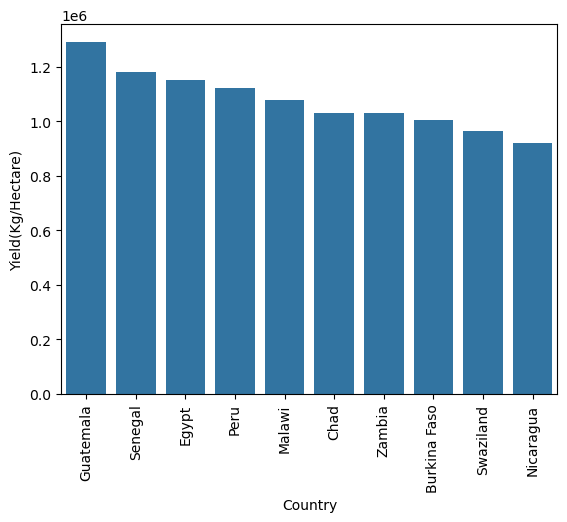

In [65]:
df_yield = df.sort_values('Yield(Kg/Hectare)',ascending=False)
ax = sns.barplot(data = df_yield.head(10),x='Country',y='Yield(Kg/Hectare)',)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

# Correlation

In [78]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric.corr()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.352369,0.997550,0.121125
Production_per_Person(Kg),0.352369,1.000000,0.341974,0.226719
Acreage(Hectare),0.997550,0.341974,1.000000,0.107826
Yield(Kg/Hectare),0.121125,0.226719,0.107826,1.000000


<Axes: >

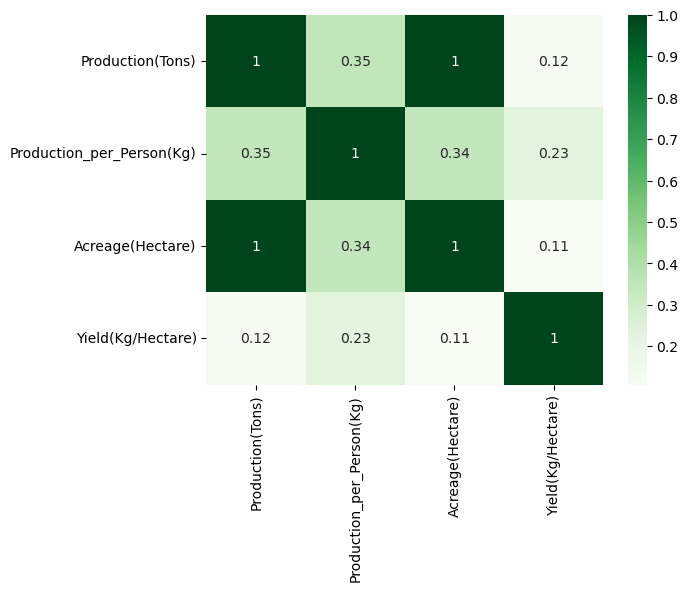

In [79]:
sns.heatmap(df_numeric.corr(),annot=True,cmap='Greens')

# Do countries with highest land produce more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

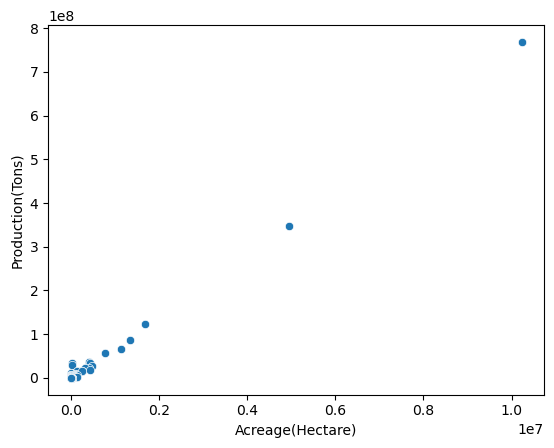

In [80]:
sns.scatterplot(data = df, x='Acreage(Hectare)', y='Production(Tons)')

##  Do countries which Yield more sugarcane per hectare produces more sugarcane in total?

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

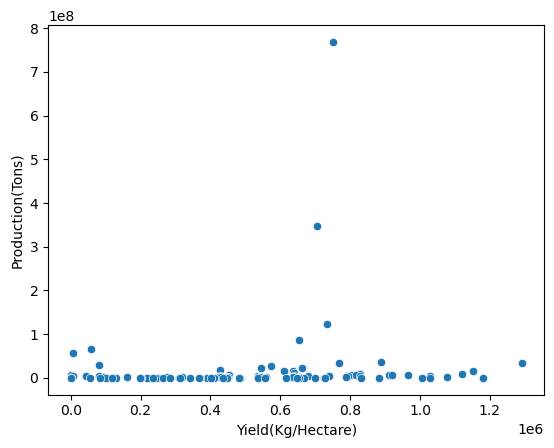

In [81]:
sns.scatterplot(data = df, x='Yield(Kg/Hectare)', y='Production(Tons)')

# Analysis for Continent

In [87]:
df_continent = df.groupby('Continent').sum()

In [88]:
df_continent

,Country,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,10144110.0,1439089.0,20700454.0
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,3120808.0,10608319.0,11197308.0
Europe,PortugalSpain,5823.0,536.0,71.0,1318709.0
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,15420953.0,1581983.0,9581162.0
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,3158066.0,490909.0,1624191.0
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,10228540.0,11369236.0,6766896.0
